**2do PARCIAL APRENDISAJE NO SUPERVISADO**
Nombre: Hinojosa Yucra Samantha Mikaela   CU: 35-5346


In [ ]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tgbot.csv to tgbot.csv


In [ ]:
# Cargar nuestro dataset .CSV
df = pd.read_csv("tgbot.csv")  # Ajusta el nombre si es diferente
df.head()



,Datetime,Open,High,Low,Close,Adj Close,Volume,rsi,macdhist,i2,...,i6,i7,i8,i9,i10,i11,i12,i13,i14,label
0,2021-07-01 00:33:00+05:30,1.185115,1.185115,1.185115,1.185115,1.185115,0,61.986535,-0.000009,-0.000141,...,0.000000,0.000000,0.000281,0.000000,0.000000,0.000000,-0.000141,0.000000,0.000140,0
1,2021-07-01 00:34:00+05:30,1.185115,1.185115,1.185115,1.185115,1.185115,0,61.986535,-0.000002,-0.000141,...,0.000000,0.000000,0.000000,0.000281,0.000000,0.000000,0.000000,-0.000141,0.000000,0
2,2021-07-01 00:35:00+05:30,1.185255,1.185255,1.185255,1.185255,1.185255,0,79.662145,0.000012,-0.000140,...,-0.000140,-0.000140,-0.000140,-0.000140,0.000141,-0.000140,-0.000140,-0.000140,-0.000281,0
3,2021-07-01 00:36:00+05:30,1.185255,1.185255,1.185255,1.185255,1.185255,0,79.662145,0.000021,-0.000140,...,-0.000281,-0.000140,-0.000140,-0.000140,-0.000140,0.000141,-0.000140,-0.000140,-0.000140,0
4,2021-07-01 00:37:00+05:30,1.185255,1.185255,1.185255,1.185255,1.185255,0,79.662145,0.000026,0.000000,...,-0.000281,-0.000281,-0.000140,-0.000140,-0.000140,-0.000140,0.000141,-0.000140,-0.000140,0


In [ ]:
# Ver columnas
print(df.columns)

# Convertimos a columnas numéricas solamente (quitamos fecha y hora)
df_clean = df.select_dtypes(include=[np.number]).copy()
df_clean = df_clean.dropna()



Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'rsi', 'macdhist', 'i2', 'i18', 'i1', 'i3', 'i4', 'i5', 'i6', 'i7',
       'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'label'],
      dtype='object')


In [ ]:
#escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


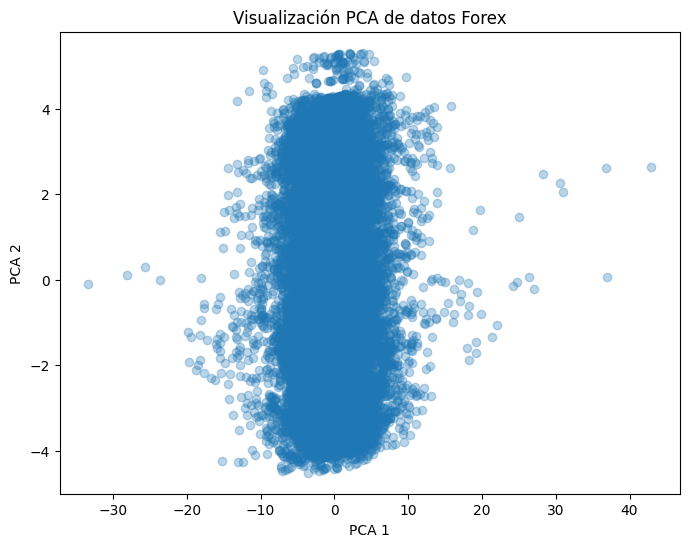

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("Visualización PCA de datos Forex")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
#aplicamos clustering con K-MEANS
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_clean['Cluster'] = labels


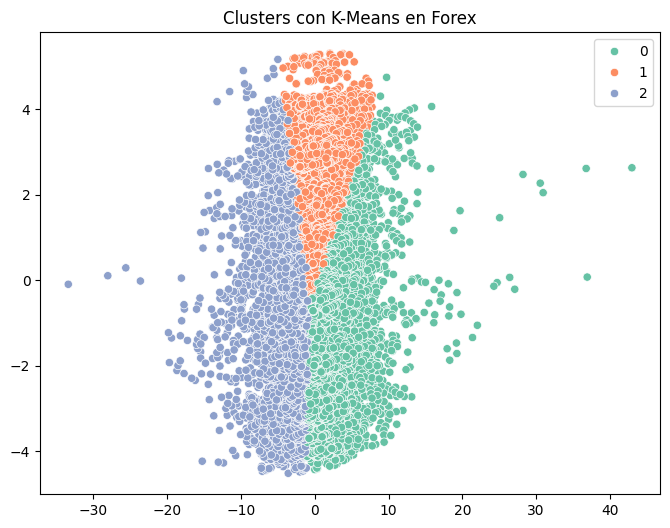

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2")
plt.title("Clusters con K-Means en Forex")
plt.show()


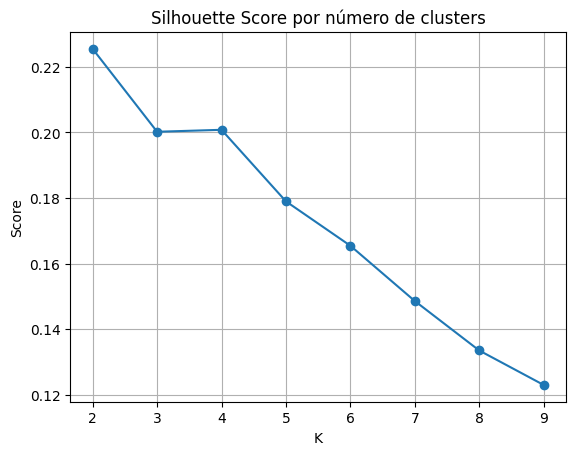

In [ ]:
#Silhouette Score
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score por número de clusters")
plt.xlabel("K")
plt.ylabel("Score")
plt.grid(True)
plt.show()